# <span style="color:blue">Problem statement : </span>   
## You have to predict the price of Old cars based on the features given in the dataset


### Columns:
- Name
- Company
- Year
- Price
- Kms driven
- Fuel typeype


In [3]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
# Loading dataset
car_data = pd.read_csv('car.csv')

In [5]:
car_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [6]:

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [7]:
# Check for null values
car_data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

## Checking for inconsistencies

In [9]:
car_data["name"].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [10]:
car_data["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [11]:
car_data["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [12]:
car_data["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [13]:
car_data["kms_driven"].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [14]:
car_data["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

# Inconsistencies in dataset
## Missing values 
1. 52 in kms_driven column
2. 55 in fuel type column

## Problem with data
1. name column has inconsistent details
2. company column has itwms like manufacturing year and irrelevant info
3. year column has irrelevant info
4. price column has "Ask for price" item
5. kms driven column has item from fuel type, like "Petrol"


> Since Company column is more important feature for a car price we are going to drop name column.

# Data cleaning 

## Cleaning Company column

In [19]:
car_data['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [20]:
companies = ['Hyundai','Mahindra','Maruti','Ford', 'Skoda', 'Audi', 
             'Toyota','Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 
             'Volkswagen','Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan',
             'Fiat','Force', 'Mercedes', 'Land', 'Yamaha','Jaguar', 'Jeep', 'Volvo','tata','TATA','Tara']

In [21]:
import re
def find_company(text, companies):
    for company in companies:
        if re.search(r'\b' + re.escape(company) + r'\b', text):
            return company
    return None
        

In [22]:
car_data['company_name'] = car_data['name'].apply(lambda x: find_company(x, companies))

In [23]:
car_data['company_name'].isnull().sum()

19

In [24]:
car_data['company_name'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', None,
       'Force', 'Mercedes', 'Land', 'Jaguar', 'Jeep', 'tata', 'Volvo',
       'TATA'], dtype=object)

In [25]:
car_data= car_data.dropna(subset=['company_name'])

In [26]:
car_data['company_name'] = car_data['company_name'].str.replace(r'\btata\b', 'Tata', case=False, regex=True)

In [27]:
car_data['company'] = car_data['company_name']
car_data = car_data.drop(columns=['company_name'])

In [28]:
car_data['company'].unique()


array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

## Cleaning Year column

In [30]:
car_data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '150k', '2003', '2004', '/-Rs', 'sale', '1995', 'ara)', '2002',
       '2001', 'odel', '2 bs', 'arry', 'o...', 'ture', 'emi', 'car',
       'able', 'no.', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'go .',
       'd...', 'k...', 'o c4', 'zire', '...', 'cab', 't xe', 'EV2'],
      dtype=object)

In [31]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 873 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        873 non-null    object
 1   company     873 non-null    object
 2   year        873 non-null    object
 3   Price       873 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 47.7+ KB


In [32]:
car_data=car_data[car_data['year'].str.isnumeric()]

In [33]:
car_data['year']=car_data['year'].astype(int)

In [34]:
car_data['year'].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [35]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


## Cleaning Price column

In [37]:
car_data.replace('Ask For Price', np.nan, inplace=True)
car_data['Price']=car_data['Price'].str.replace(',', '').astype(float)


In [38]:
car_data['Price'].fillna(car_data['Price'].median(),inplace=True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_7812\122620548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['Price'].fillna(car_data['Price'].median(),inplace=True)


In [39]:
car_data['Price'].unique()

array([  80000.,  425000.,  299999.,  325000.,  575000.,  175000.,
        190000.,  830000.,  250000.,  182000.,  315000.,  415000.,
        320000., 1000000.,  500000.,  350000.,  160000.,  310000.,
         75000.,  100000.,  290000.,   95000.,  180000.,  385000.,
        105000.,  650000.,  689999.,  448000.,  549000.,  501000.,
        489999.,  280000.,  349999.,  284999.,  345000.,  499999.,
        235000.,  249999., 1475000.,  395000.,  220000.,  170000.,
         85000.,  200000.,  570000.,  110000.,  448999., 1891111.,
        159500.,  344999.,  449999.,  865000.,  699000.,  375000.,
        224999., 1200000.,  195000.,  351000.,  240000.,   90000.,
        155000.,  600000.,  189500.,  210000.,  390000.,  135000.,
       1600000.,  701000.,  265000.,  525000.,  372000.,  635000.,
        550000.,  485000.,  329500.,  251111.,  569999.,   69999.,
        399999.,  450000.,  270000.,  158400.,  179000.,  125000.,
        299000.,  150000.,  275000.,  285000.,  340000.,   700

In [40]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        842 non-null    object 
 1   company     842 non-null    object 
 2   year        842 non-null    int32  
 3   Price       842 non-null    float64
 4   kms_driven  840 non-null    object 
 5   fuel_type   837 non-null    object 
dtypes: float64(1), int32(1), object(4)
memory usage: 42.8+ KB


## Cleaning Kms_driven column

In [42]:
car_data['kms_driven'] .unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [43]:
car_data[car_data['kms_driven']=='Petrol'].index

Index([890, 891], dtype='int64')

In [44]:
car_data.at[890,'fuel_type']=car_data.at[890,'kms_driven']
car_data.at[891,'fuel_type']=car_data.at[891,'kms_driven']
car_data['kms_driven'].replace('Petrol', np.nan, inplace=True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_7812\2803389383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['kms_driven'].replace('Petrol', np.nan, inplace=True)


In [45]:
car_data['kms_driven'] = car_data['kms_driven'].str.replace(' kms', '').str.replace(',', '').astype(float)

In [46]:
car_data['kms_driven'].fillna(car_data['kms_driven'].median(),inplace=True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_7812\982515724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['kms_driven'].fillna(car_data['kms_driven'].median(),inplace=True)


In [47]:
car_data['kms_driven'].astype(int)

0       45000
1          40
2       22000
3       28000
4       36000
        ...  
886    132000
888     27000
889     40000
890     41000
891     41000
Name: kms_driven, Length: 842, dtype: int32

## Cleaning fuel_type column

In [49]:
car_data["fuel_type"].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [50]:
car_data['fuel_type'].mode()

0    Petrol
Name: fuel_type, dtype: object

In [51]:
car_data['fuel_type'].fillna('Petrol',inplace=True)

C:\Users\utkar\AppData\Local\Temp\ipykernel_7812\219806530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_data['fuel_type'].fillna('Petrol',inplace=True)


In [52]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        842 non-null    object 
 1   company     842 non-null    object 
 2   year        842 non-null    int32  
 3   Price       842 non-null    float64
 4   kms_driven  842 non-null    float64
 5   fuel_type   842 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 75.0+ KB


In [53]:
car_data["fuel_type"].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

## Cross check for consistency

In [55]:
car_data.shape

(842, 6)

In [56]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        842 non-null    object 
 1   company     842 non-null    object 
 2   year        842 non-null    int32  
 3   Price       842 non-null    float64
 4   kms_driven  842 non-null    float64
 5   fuel_type   842 non-null    object 
dtypes: float64(2), int32(1), object(3)
memory usage: 75.0+ KB


In [57]:
car_data["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [58]:
car_data["year"].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [59]:
car_data["Price"].unique()

array([  80000.,  425000.,  299999.,  325000.,  575000.,  175000.,
        190000.,  830000.,  250000.,  182000.,  315000.,  415000.,
        320000., 1000000.,  500000.,  350000.,  160000.,  310000.,
         75000.,  100000.,  290000.,   95000.,  180000.,  385000.,
        105000.,  650000.,  689999.,  448000.,  549000.,  501000.,
        489999.,  280000.,  349999.,  284999.,  345000.,  499999.,
        235000.,  249999., 1475000.,  395000.,  220000.,  170000.,
         85000.,  200000.,  570000.,  110000.,  448999., 1891111.,
        159500.,  344999.,  449999.,  865000.,  699000.,  375000.,
        224999., 1200000.,  195000.,  351000.,  240000.,   90000.,
        155000.,  600000.,  189500.,  210000.,  390000.,  135000.,
       1600000.,  701000.,  265000.,  525000.,  372000.,  635000.,
        550000.,  485000.,  329500.,  251111.,  569999.,   69999.,
        399999.,  450000.,  270000.,  158400.,  179000.,  125000.,
        299000.,  150000.,  275000.,  285000.,  340000.,   700

In [60]:
car_data["kms_driven"].unique()

array([4.50000e+04, 4.00000e+01, 2.20000e+04, 2.80000e+04, 3.60000e+04,
       5.90000e+04, 4.10000e+04, 2.50000e+04, 2.45300e+04, 6.00000e+04,
       3.00000e+04, 3.20000e+04, 4.86600e+04, 4.00000e+03, 1.69340e+04,
       4.30000e+04, 3.55500e+04, 3.95220e+04, 3.90000e+04, 5.50000e+04,
       7.20000e+04, 1.59750e+04, 7.00000e+04, 2.34520e+04, 3.55220e+04,
       4.85080e+04, 1.54870e+04, 8.20000e+04, 2.00000e+04, 6.80000e+04,
       3.80000e+04, 2.70000e+04, 3.30000e+04, 4.60000e+04, 1.60000e+04,
       4.70000e+04, 3.50000e+04, 3.08740e+04, 1.50000e+04, 2.96850e+04,
       1.30000e+05, 1.90000e+04, 5.40000e+04, 1.30000e+04, 3.82000e+04,
       5.00000e+04, 1.35000e+04, 3.60000e+03, 4.58630e+04, 6.05000e+04,
       1.25000e+04, 1.80000e+04, 1.33490e+04, 2.90000e+04, 4.40000e+04,
       4.20000e+04, 1.40000e+04, 4.90000e+04, 3.62000e+04, 5.10000e+04,
       1.04000e+05, 3.33330e+04, 3.36000e+04, 5.60000e+03, 7.50000e+03,
       2.60000e+04, 2.43300e+04, 6.54800e+04, 2.80280e+04, 2.000

In [61]:
car_data.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000.0,40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,299999.0,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000.0,Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,299999.0,59000.0,Diesel
6,Ford Figo,Ford,2012,175000.0,41000.0,Diesel
7,Hyundai Eon,Hyundai,2013,190000.0,25000.0,Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,830000.0,24530.0,Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,250000.0,60000.0,Petrol


In [62]:
car_data.describe()

,year,Price,kms_driven
count,842.000000,8.420000e+02,842.000000
mean,2012.523753,4.079294e+05,45986.747031
std,4.024601,4.683032e+05,34389.283568
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.782500e+05,25125.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.899990e+05,56300.000000
max,2019.000000,8.500003e+06,400000.000000


> ***For convineance we drop name column and export cleaned sheet*** 

In [64]:
car_data = car_data.drop(columns=['name'])
car_data.to_csv('cln_car.csv')

## Data Exploration

In [66]:
car=pd.read_csv('cln_car.csv',index_col=0)

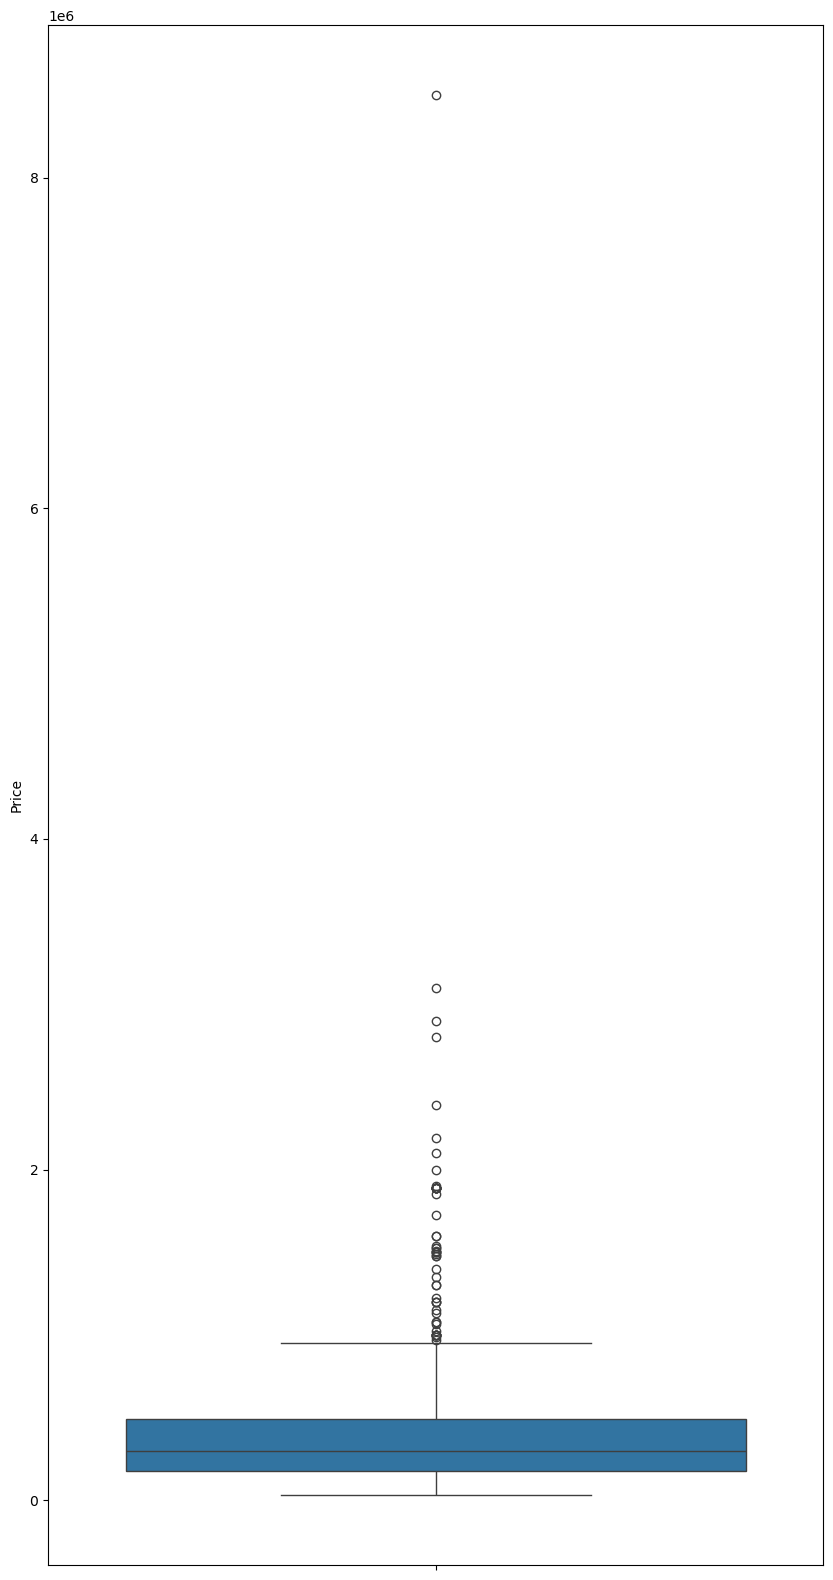

In [67]:
plt.figure(figsize=(10, 20))

sns.boxplot(y = 'Price', data = car)

plt.show()

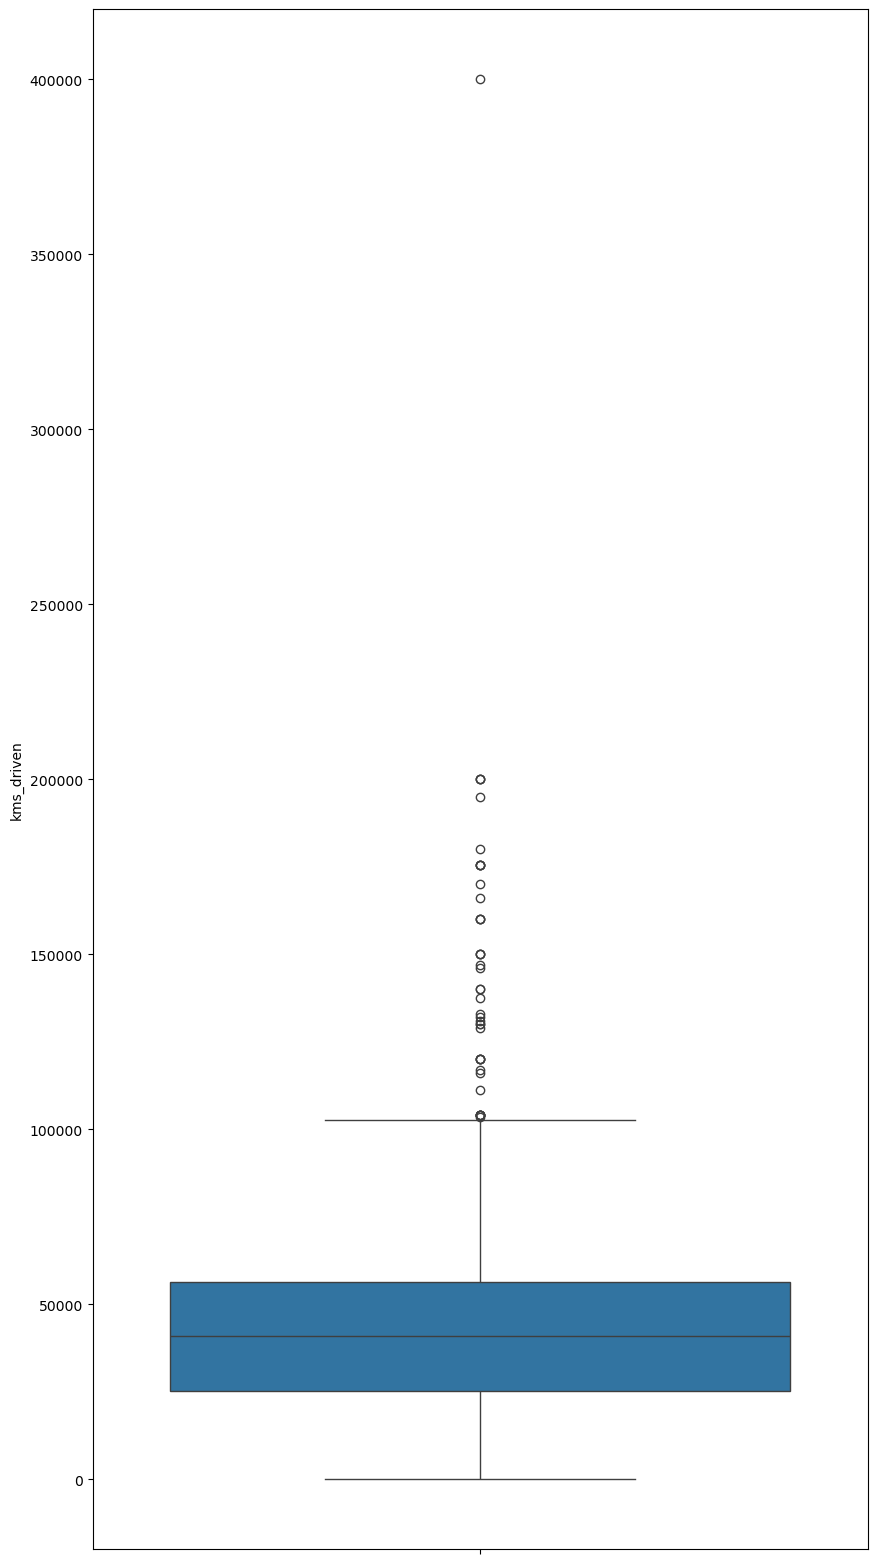

In [68]:





plt.figure(figsize=(10, 20))

sns.boxplot(y = 'kms_driven', data = car)

plt.show()

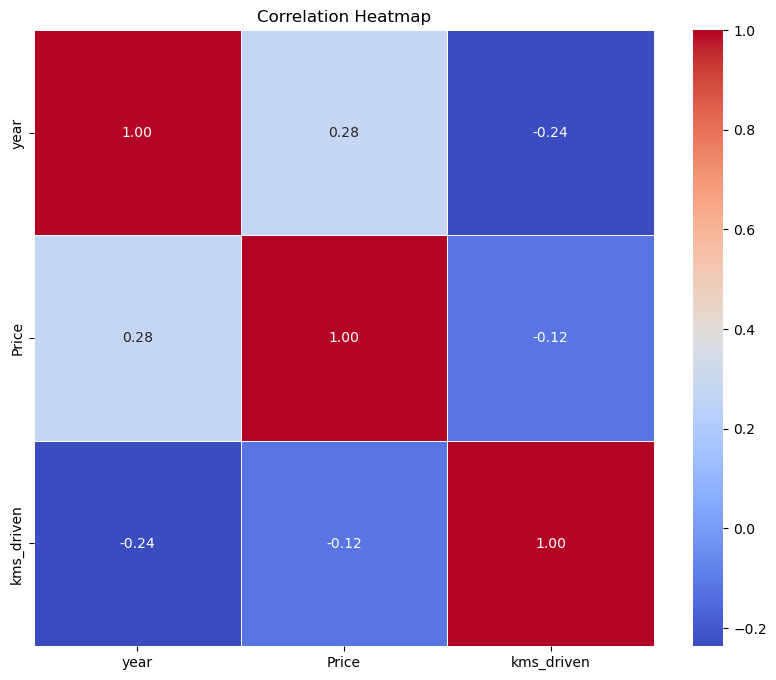

In [69]:
correlation_matrix = car[['year','Price','kms_driven']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

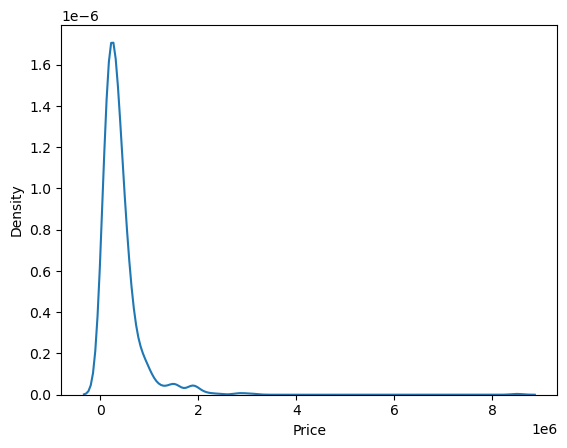

In [70]:
# Check the distribution of the target column
sns.kdeplot(car['Price'])
plt.show()

In [71]:
car.describe()

,year,Price,kms_driven
count,842.000000,8.420000e+02,842.000000
mean,2012.523753,4.079294e+05,45986.747031
std,4.024601,4.683032e+05,34389.283568
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.782500e+05,25125.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.899990e+05,56300.000000
max,2019.000000,8.500003e+06,400000.000000


> ***There are outliers because of expensive cars like BMW and mini have relatively much higher price than other brands but we are including those brands too in the model so we are not removing these outliers.***

In [73]:
car1=car.copy()
car2=car.copy()

In [74]:
lr=LabelEncoder()
car1['company']=lr.fit_transform(car1['company'])
car1['fuel_type']=lr.fit_transform(car1['fuel_type'])

In [75]:
car1.head(3)

,company,year,Price,kms_driven,fuel_type
0,9,2007,80000.0,45000.0,2
1,13,2006,425000.0,40.0,0
2,14,2018,299999.0,22000.0,2


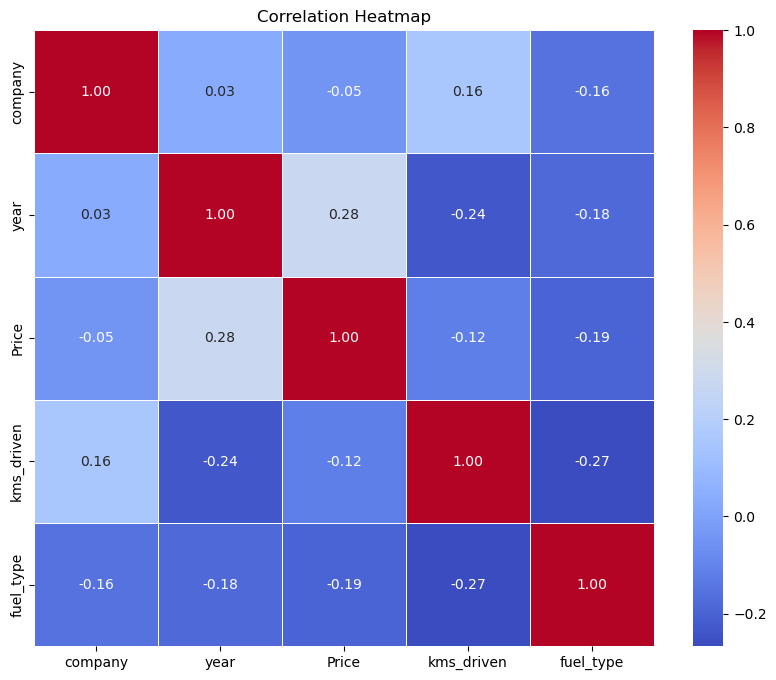

In [76]:
correlation_matrix = car1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [77]:
X = car1.drop(columns='Price')
y = car1['Price']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [80]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 228941.26914636957


In [81]:
mse=mean_squared_error(y_test,y_pred,squared=False)
mse

C:\Users\utkar\anaconda3.2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


598437.9134179081

In [82]:
import math 
Rsq=math.sqrt(mse)
print('Rsq',Rsq)
print('r2score',r2_score(y_test,y_pred))

Rsq 773.5876895465104
r2score 0.06543659763712684


## Model building

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [85]:
x=car.drop(columns='Price')
y=car['Price']

In [86]:
ohe=OneHotEncoder()
ohe.fit(x[['company','fuel_type']])

OneHotEncoder()

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)


In [88]:
ohe.categories_

[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
        'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
        'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
       dtype=object),
 array(['Diesel', 'LPG', 'Petrol'], dtype=object)]

In [89]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['company','fuel_type']),
                                     remainder='passthrough')

In [90]:
lr=LinearRegression()

In [91]:
# create a pipeline that sequentially applies a list of transformations followed by a final estimator.
pipe=make_pipeline(column_trans,lr)

In [92]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['company', 'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [93]:
y_pred=pipe.predict(x_test)

In [94]:
y_pred

array([ 214081.24213385,  330812.98126148,  458348.467797  ,
         83178.18882395,  372309.34997625,   89726.39698251,
        354906.42288836,  449520.5721477 ,  187379.6364063 ,
        335970.24884049,  395078.59988569,  664293.25233033,
        334652.08913261,  -26086.82445633,  308840.11211025,
        659860.67983421,  182040.67002574,  395335.87548109,
        605469.97744033,  590771.36404791,  460491.12281047,
        359614.38890222,  -29707.91142911,  170647.62036985,
        731987.11897608,  146586.74544276,  350835.37836277,
       1802939.61469633,  576470.21493924,  404952.78960124,
        -47087.25538044,  487487.84058302,  640950.09906479,
        633227.05668393,  273778.80020487,  579898.46296079,
         24907.59285276,  116060.92739075,  336611.75975152,
        486870.31954302,  331455.77776552,  439249.68047695,
        308722.26608451,  -61480.06779213,   35393.34265035,
        399481.22436894,  430723.11938285,   60305.40456706,
        459860.81656652,

In [95]:
y_test

842    175000.0
756    200000.0
489    399000.0
840     85000.0
513    499000.0
         ...   
814    599999.0
745    424999.0
718    970000.0
612    160000.0
435    210000.0
Name: Price, Length: 169, dtype: float64

In [96]:
r2_score(y_test,y_pred)

0.16512935153951835

## Model performance and optimization

In [98]:
'''This is a loop that performs a series of operations to evaluate the performance of a linear regression model
 using different random states to find set of train-test pair with highest r2score'''
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [99]:
np.argmax(scores)

915

In [100]:
scores[np.argmax(scores)]

0.7207560704396985

### Retrain model with train-test pair of highest R2score

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.7207560704396985

## Saving the model

In [104]:
import pickle

In [105]:
pickle.dump(pipe,open('LinearRegression.pkl','wb'))

## Testing model performance

In [107]:
pipe.predict(pd.DataFrame([['Ford',2014,30000,'Diesel']],columns=['company','year','kms_driven','fuel_type']))

array([648985.12060993])

In [108]:
pipe.predict(pd.DataFrame([['Ford',2014,36000,'Petrol']],columns=['company','year','kms_driven','fuel_type']))

array([501992.13941689])

In [109]:
car3 = car[(car['company'] == 'Ford') & (car['year'] == 2014)]

car3

,company,year,Price,kms_driven,fuel_type
4,Ford,2014,575000.0,36000.0,Diesel
106,Ford,2014,550000.0,44000.0,Diesel
113,Ford,2014,195000.0,50000.0,Diesel
260,Ford,2014,195000.0,50000.0,Diesel
308,Ford,2014,520000.0,57000.0,Diesel
442,Ford,2014,500000.0,40000.0,Diesel
663,Ford,2014,465000.0,47000.0,Petrol
705,Ford,2014,400000.0,16000.0,Petrol
767,Ford,2014,590000.0,34000.0,Diesel


In [110]:
pipe.predict(pd.DataFrame([['BMW',2009,35000,'Petrol']],columns=['company','year','kms_driven','fuel_type']))

array([927548.45141353])

In [111]:
car3 = car[(car['company'] == 'BMW')]

car3

,company,year,Price,kms_driven,fuel_type
94,BMW,2011,600000.0,60500.0,Petrol
100,BMW,2009,1600000.0,35000.0,Petrol
445,BMW,2011,1299000.0,49000.0,Diesel
554,BMW,2011,1150000.0,72000.0,Diesel
575,BMW,2009,650000.0,37518.0,Petrol
669,BMW,2011,1075000.0,35000.0,Diesel
671,BMW,2012,1025000.0,41000.0,Diesel
696,BMW,2011,1000000.0,34000.0,Diesel
